# Data Analysis

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

## Histogram

In [180]:
df = pd.read_csv("current_ratings.csv")
df[["2", "3"]]

2     3
0             images/women/Queen_Rania.jpg  10.0
1              images/women/Heidi_Klum.jpg   6.2
2            images/women/Taylor_Swift.jpg   7.1
3           images/men/Chris_Hemsworth.jpg  10.0
4                images/men/Bill_Gates.jpg   2.7
...                                    ...   ...
3493       images/women/Venus_Williams.jpg   7.1
3494      images/women/Auliʻi_Cravalho.jpg   5.4
3495        images/women/Kathy_Griffin.jpg   2.6
3496           images/women/Gigi_Hadid.jpg   7.7
3497  images/women/Christiane_Amanpour.jpg   2.9

[3498 rows x 2 columns]

In [181]:
men_df = df[df["2"].str.contains("/men")]
women_df = df[df["2"].str.contains("/women")]

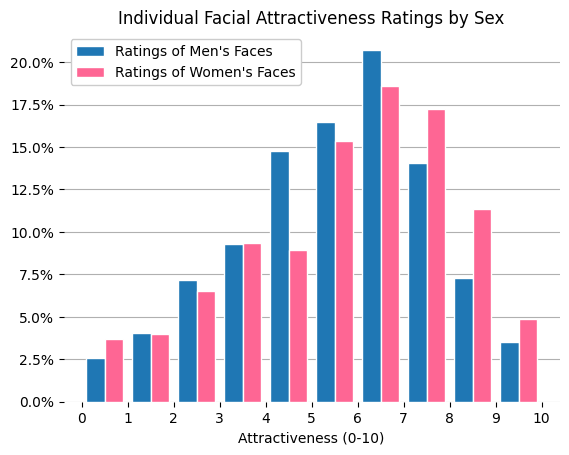

In [182]:
plt.hist([men_df["3"], women_df["3"]], density=True, bins=10, color=['tab:blue', '#fe6694'], edgecolor='white', label=["Ratings of Men's Faces", "Ratings of Women's Faces"])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Distribution of 1,177 Facial Attractiveness Ratings
# 1,177 Facial Attractiveness Ratings of Men and Women
plt.title("Individual Facial Attractiveness Ratings by Sex")
plt.legend().get_frame().set_alpha(1)
plt.xlabel("Attractiveness (0-10)")
#plt.ylabel("Frequency")
plt.grid(axis='y', zorder=0)

source_text = "Source: tentonone.com"
plt.text(0.05, 0.921, source_text, horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=9)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.xticks(np.arange(0, 11))


#plt.savefig("men_vs_women.png")
plt.show()

## Clustered Bar Chart

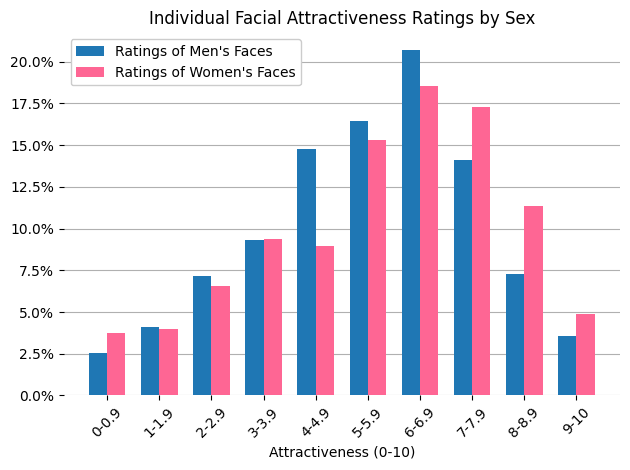

In [6]:
# color=['tab:blue', '#fe6694']

data1 = men_df["3"]
data2 = women_df["3"]

# Define bins
num_bins = 10
bin_edges = np.linspace(0, 10, num_bins + 1)

# Calculate histogram for data1
hist1, _ = np.histogram(data1, bins=bin_edges)

# Calculate histogram for data2
hist2, _ = np.histogram(data2, bins=bin_edges)

# Calculate percentage for data1
total_values1 = len(data1)
percentage1 = (hist1 / total_values1)# * 100

# Calculate percentage for data2
total_values2 = len(data2)
percentage2 = (hist2 / total_values2)# * 100

# Plotting the clustered bar chart
bar_width = 0.35
index = np.arange(num_bins)

plt.bar(index, percentage1, bar_width, label='Ratings of Men\'s Faces', color="tab:blue")
plt.bar(index + bar_width, percentage2, bar_width, label='Ratings of Women\'s Faces', color="#fe6694")

xticks = [f"{i}-{i+0.9}" for i in range(10)]
xticks[-1] = "9-10"
plt.xticks(index + bar_width / 2, xticks, rotation=45)

plt.title("Individual Facial Attractiveness Ratings by Sex")
plt.legend().get_frame().set_alpha(1)
plt.xlabel("Attractiveness (0-10)")
plt.grid(axis='y', zorder=0)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.xticks(np.arange(0, 11))

# Display the plot
plt.tight_layout()
plt.show()

## KDE of Average Ratings of Men's Faces vs. Women's Faces

In [8]:
average_ratings = df.groupby('2')['3'].mean()
average_ratings.head()

2
images/men/21_Savage.jpg        5.500
images/men/Aamir_Khan.jpg       4.400
images/men/Aaron_Paul.jpg       6.800
images/men/Aaron_Rodgers.jpg    5.460
images/men/Adam_Driver.jpg      6.275
Name: 3, dtype: float64

In [9]:
where_avg_ratings_men = []
where_avg_ratings_women = []
for filename in average_ratings.index:
    if "/men" in filename:
        where_avg_ratings_men.append(True)
        where_avg_ratings_women.append(False)
    else:
        where_avg_ratings_men.append(False)
        where_avg_ratings_women.append(True)


men_average_ratings = average_ratings[where_avg_ratings_men]
women_average_ratings = average_ratings[where_avg_ratings_women]

In [10]:
men_average_ratings.head()

2
images/men/21_Savage.jpg        5.500
images/men/Aamir_Khan.jpg       4.400
images/men/Aaron_Paul.jpg       6.800
images/men/Aaron_Rodgers.jpg    5.460
images/men/Adam_Driver.jpg      6.275
Name: 3, dtype: float64

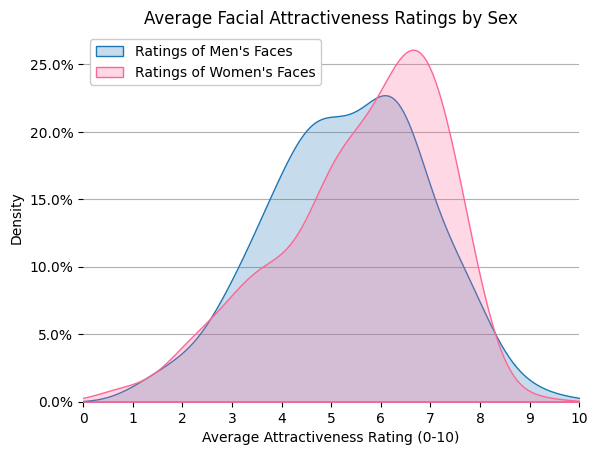

In [11]:
# Example data
lists = [men_average_ratings,  women_average_ratings]
colors = ['tab:blue', '#fe6694']  # Define colors for each list
labels = ['Ratings of Men\'s Faces', 'Ratings of Women\'s Faces']

# Plot KDE for each list separately
for i, lst in enumerate(lists):
    sns.kdeplot(data=lst, color=colors[i], label=labels[i], fill=True)

# Add legend
plt.legend(loc='upper left').get_frame().set_alpha(1)

plt.title("Average Facial Attractiveness Ratings by Sex")
plt.xlabel("Average Attractiveness Rating (0-10)")

plt.grid(axis='y', zorder=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(np.arange(0, 11))

plt.xlim(left=0, right=10)

# Show plot
plt.show()

## Facial Landmark Detection and Correlation

Ideas
- Canthal Tilt
      - Requires some math to even out tilted faces, people looking away, etc.
- Eyebrow length? Tilt? Something to do with eyebrows?
- Length of nose bridge
- Distance between eyes vs width of face? (hard for people looking away)
- Face ratios (1/3 from chin->nose, nose->eyebrow), (1/5 widths)?
- Jaw width
- ...
- Ask r/beauty? r/looksmaxing?

In [12]:
import dlib
import cv2
import math

In [13]:
def find_landmarks(filepath):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    
    # Load the input image
    image = cv2.imread(filepath)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    face = detector(gray)[0]

    landmarks = predictor(gray, face)
    return landmarks

In [14]:
def show_image_landmarks(filepath, landmarks, indices=list(range(0, 68))):
    image = cv2.imread(filepath)
    # Loop over the facial landmarks
    for n in indices:
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        
        # Draw a circle around each landmark point
        cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [31]:
def full_object_detection_to_nparray(full_object_detection):
    num_parts = full_object_detection.num_parts
    coordinates = np.zeros((num_parts, 2), dtype=int)

    for i in range(num_parts):
        coordinates[i] = (full_object_detection.part(i).x, full_object_detection.part(i).y)

    return coordinates

- Indices 0-16: Jawline
- Indices 17-21: Right eyebrow
- Indices 22-26: Left eyebrow
- Indices 27-30: Nose bridge
- Indices 31-35: Bottom of the nose
- Indices 36-41: Right eye
- Indices 42-47: Left eye
- Indices 48-67: Outer mouth

### Canthal Tilt

In [15]:
filepath = "images/men/Bad_Bunny.jpg"

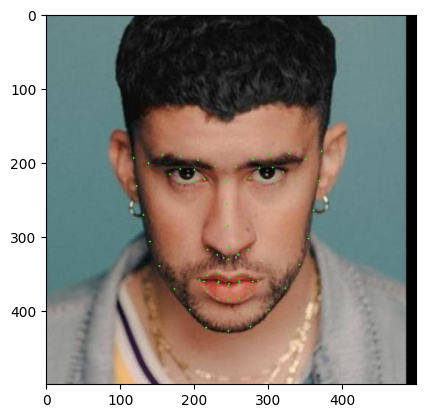

In [16]:
landmarks = find_landmarks(filepath)
show_image_landmarks(filepath, landmarks)

In [17]:
# Already wrote canthal tilt data to csv file
average_ratings = pd.read_csv("ratings_with_canthal_tilt.csv")

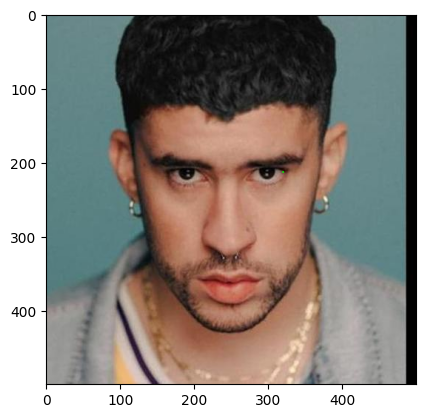

In [18]:
right_eye = list(range(36, 42))
left_eye = list(range(42, 48))

show_image_landmarks(filepath, landmarks, [45])

# 39: In corner of right eye
# 36: Out corner of right eye

# 42: In corner of left eye
# 45: Out corner of left eye

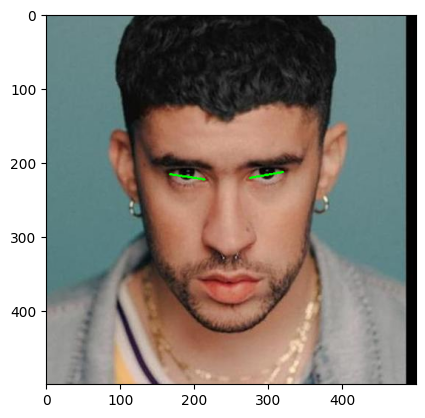

In [19]:
image = cv2.imread(filepath)
# Define the color of the line in BGR format (here, green)
color = (0, 255, 0)

in_right = (landmarks.part(39).x, landmarks.part(39).y)
out_right = (landmarks.part(36).x, landmarks.part(36).y)

in_left = (landmarks.part(42).x, landmarks.part(42).y)
out_left = (landmarks.part(45).x, landmarks.part(45).y)

# Draw the line on the image
image_with_line = cv2.line(image, in_right, out_right, color, thickness=2)
image_with_line = cv2.line(image, in_left, out_left, color, thickness=2)
image_with_line = cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB)
plt.imshow(image_with_line)

In [20]:
import math

def calculate_canthal_tilt(in_right, out_right, in_left, out_left):
    right_eye_slope = (in_right[1] - out_right[1]) / (in_right[0] - out_right[0])
    left_eye_slope = (in_left[1] - out_left[1]) / (in_left[0] - out_left[0])
    vertical_orientation_slope = (in_left[1] - in_right[1]) / (in_left[0] - in_right[0])

    right_angle_rad = math.atan2(right_eye_slope - vertical_orientation_slope, 1 + vertical_orientation_slope * right_eye_slope)
    right_angle_deg = math.degrees(right_angle_rad)
    #print(right_angle_deg)

    left_angle_rad = math.atan2(left_eye_slope - vertical_orientation_slope, 1 + vertical_orientation_slope * left_eye_slope)
    left_angle_deg = -math.degrees(left_angle_rad)
    #print(abs(left_angle_deg))

    return left_angle_deg, right_angle_deg

calculate_canthal_tilt(in_right, out_right, in_left, out_left)

(8.202720540256964, 10.349022080300191)

In [21]:
def display_canthal_tilt(filepath):
    landmarks = find_landmarks(filepath)
    # Define the color of the line in BGR format (here, green)
    color = (0, 255, 0)
    
    in_right = (landmarks.part(39).x, landmarks.part(39).y)
    out_right = (landmarks.part(36).x, landmarks.part(36).y)
    
    in_left = (landmarks.part(42).x, landmarks.part(42).y)
    out_left = (landmarks.part(45).x, landmarks.part(45).y)

    left_angle_deg, right_angle_deg = calculate_canthal_tilt(in_right, out_right, in_left, out_left)
    print(f"Left eye: {left_angle_deg}")
    print(f"Right eye: {right_angle_deg}")
    
    # Draw the line on the image
    image = cv2.imread(filepath)
    image_with_line = cv2.line(image, in_right, out_right, color, thickness=2)
    image_with_line = cv2.line(image, in_left, out_left, color, thickness=2)
    image_with_line = cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB)
    plt.imshow(image_with_line)

Left eye: 1.8333823597777166
Right eye: -0.515864411973748


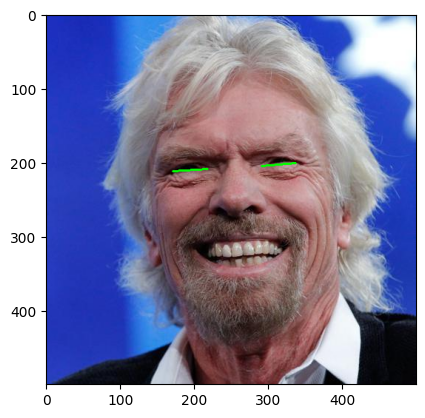

In [22]:
filepath = "images/men/Richard_Branson.jpg"
display_canthal_tilt(filepath)

In [23]:
def get_average_canthal_tilt(filepath):
    print(f"\n{filepath}: ")
    try:
        landmarks = find_landmarks(filepath)
        # Define the color of the line in BGR format (here, green)
        color = (0, 255, 0)
        
        in_right = (landmarks.part(39).x, landmarks.part(39).y)
        out_right = (landmarks.part(36).x, landmarks.part(36).y)
        
        in_left = (landmarks.part(42).x, landmarks.part(42).y)
        out_left = (landmarks.part(45).x, landmarks.part(45).y)
    
        left_angle_deg, right_angle_deg = calculate_canthal_tilt(in_right, out_right, in_left, out_left)
        average_canthal_tilt = (left_angle_deg + right_angle_deg) / 2
        print(average_canthal_tilt)
        return average_canthal_tilt
    except:
        return None

filepath = "images/men/Richard_Branson.jpg"
get_average_canthal_tilt(filepath)


images/men/Richard_Branson.jpg: 
0.6587589739019843


0.6587589739019843

In [26]:
average_ratings = pd.DataFrame(average_ratings).reset_index()
average_ratings.head()

index  Unnamed: 0                             2      3  canthal_tilt gender
0      0           0      images/men/21_Savage.jpg  5.500      4.515908    men
1      1           1     images/men/Aamir_Khan.jpg  4.400      5.533981    men
2      2           2     images/men/Aaron_Paul.jpg  6.800      3.374309    men
3      3           3  images/men/Aaron_Rodgers.jpg  5.460     -2.597214    men
4      4           4    images/men/Adam_Driver.jpg  6.275      5.237117    men

In [ ]:
average_ratings['canthal_tilt'] = average_ratings['2'].apply(get_average_canthal_tilt)

In [ ]:
average_ratings.head()

Checking for errors...

In [ ]:
average_ratings[average_ratings["2"] == "images/men/Triple_H.jpg"]

In [ ]:
average_ratings[average_ratings["canthal_tilt"] == 0]

In [ ]:
display_canthal_tilt("images/men/Barack_Obama.jpg")

In [ ]:
average_ratings.at[317, "canthal_tilt"] = get_average_canthal_tilt("images/men/Paul_Levesque.jpg")

In [ ]:
null_rows = average_ratings[average_ratings.isnull().any(axis=1)]
null_rows

In [ ]:
average_ratings.fillna(average_ratings["canthal_tilt"].mean(), inplace=True)

In [ ]:
null_rows = average_ratings[average_ratings.isnull().any(axis=1)]
null_rows

Time to add gender to the dataframe so I can color code the scatterplot.

In [ ]:
np.polyfit(list(x), list(y), 1)

In [ ]:
def get_gender(filepath):
    if "/men" in filepath:
        return "men"
    else:
        return "women"

In [ ]:
average_ratings["gender"] = average_ratings["2"].apply(get_gender)
average_ratings.head()

In [ ]:
# Just in case I want to use it later
average_ratings.to_csv("ratings_with_canthal_tilt.csv")

Finally, it's time to scatter!

In [24]:
colors

['tab:blue', '#fe6694']

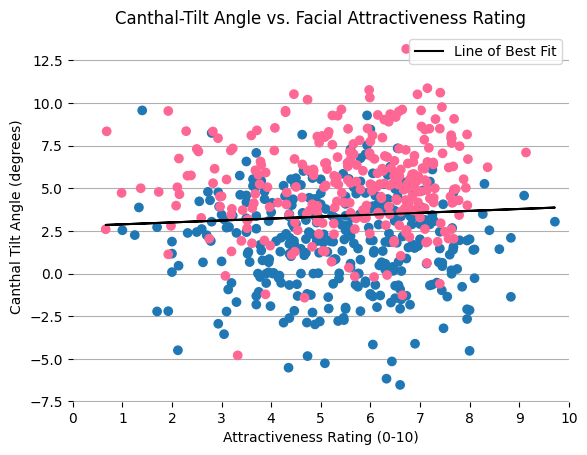

In [25]:
x = average_ratings["3"]
y = average_ratings["canthal_tilt"]


category_colors = {'men': 'tab:blue', 'women': '#fe6694'}  # Add more colors as needed
# Generate an array of colors based on the category variable
colors = [category_colors[cat] for cat in average_ratings["gender"]]


coefficients = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (a straight line)

# Step 4: Generate points for the line of best fit
line_of_best_fit = np.poly1d(coefficients)

# Step 5: Plot the data and the line of best fit
plt.scatter(x, y, c=colors)
plt.plot(x, line_of_best_fit(x), color='black', label='Line of Best Fit')

plt.title("Canthal-Tilt Angle vs. Facial Attractiveness Rating")
plt.legend().set_alpha(1)
plt.xlabel("Attractiveness Rating (0-10)")
plt.ylabel("Canthal Tilt Angle (degrees)")

plt.grid(axis='y', zorder=0)
#plt.grid(zorder=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_axisbelow(True)
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(np.arange(0, 11))

plt.xlim(left=0, right=10)
plt.show()

There is ***not*** a strong correlation between canthal tilt and facial attractiveness rating according to this data.

### Composite Faces

In [27]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Function to load and preprocess images
def load_and_preprocess_images(folder_path, resize_dims=None):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = plt.imread(os.path.join(folder_path, filename))
            if resize_dims:
                img = cv2.resize(img, resize_dims)
            images.append(img)
    return images

# Function to average images
def average_images(images):
    total = np.zeros_like(images[0], dtype=np.float64)
    for img in images:
        total += img.astype(np.float64)
    average = (total / len(images)).astype(np.uint8)
    return average

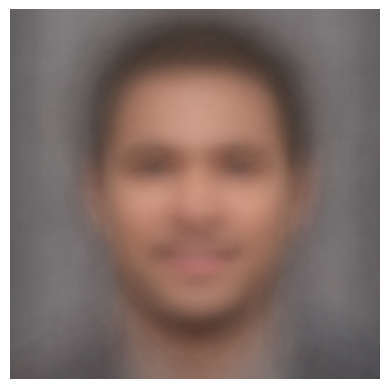

In [28]:
# Load and preprocess images
images_folder = 'images/men'
images = load_and_preprocess_images(images_folder, resize_dims=(200, 200))

# Average images
composite_face = average_images(images)

# Display the composite face using Matplotlib
plt.imshow(composite_face)
plt.axis('off')
plt.show()

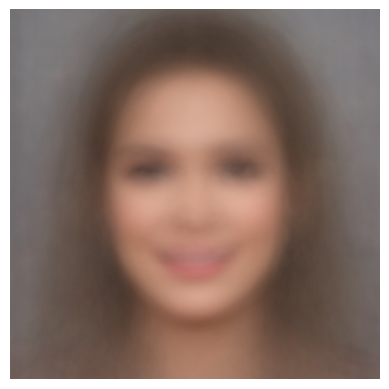

In [29]:
# Load and preprocess images
images_folder = 'images/women'
images = load_and_preprocess_images(images_folder, resize_dims=(200, 200))

# Average images
composite_face = average_images(images)

# Display the composite face using Matplotlib
plt.imshow(composite_face)
plt.axis('off')
plt.show()

These are alright, but I want them clearer. Let me try to shift the eyes and nose...

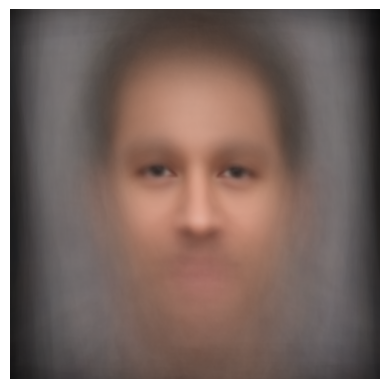

In [33]:
import pathlib
from PIL import Image

'''
        nose_tip: 30
        in_right: 39
        in_left: 42
'''

def align_image(image, landmarks):
    # Define desired output size
    desired_size = (500, 500)
    
    # Define the reference landmarks (a set of points in the desired output image)
    reference_landmarks = np.array([
        [255., 288.], [221., 224.], [284., 225.]  # Nose tip, inner right eye, inner left eye
    ], dtype=np.float32)
    
    # Convert landmarks to numpy array if it's not already
    landmarks = np.array(landmarks, dtype=np.float32)
    
    # Ensure there are enough points for transformation
    if landmarks.shape[0] < 3:
        raise ValueError("At least 3 facial landmarks are required for alignment.")
    
    # Extract the first three landmarks for alignment
    src_points = np.array([landmarks[30], landmarks[39], landmarks[42]])
    
    # Compute the affine transformation matrix
    transformation_matrix = cv2.getAffineTransform(src_points, reference_landmarks)
    
    # Apply the transformation to the original image
    aligned_image = cv2.warpAffine(image, transformation_matrix, desired_size)
    
    return aligned_image

# Load and align all images
aligned_images = []
images = [str(path) for path in list(pathlib.Path("images/men").glob("*.jpg"))]
for i in range(len(images)):
    image = cv2.imread(images[i])
    try:
        landmarks = find_landmarks(images[i])
        landmarks_array = full_object_detection_to_nparray(landmarks)
        if landmarks is not None:
            aligned_image = align_image(image, landmarks_array)
            aligned_images.append(aligned_image)
    except:
        continue

# Calculate the average image
average_image = np.mean(aligned_images, axis=0).astype(np.uint8)
average_image = cv2.cvtColor(average_image, cv2.COLOR_BGR2RGB)

image = Image.fromarray(average_image, )
image.save("composite_man.jpg")

# Display the composite face
plt.imshow(image)
plt.axis('off')
plt.show()

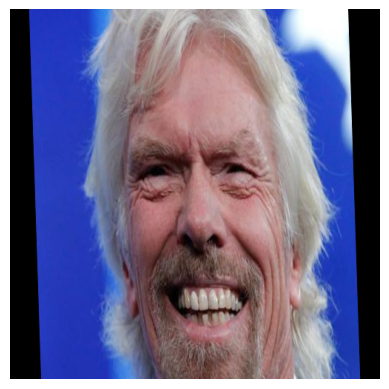

In [34]:
image = cv2.imread(filepath)
landmarks = find_landmarks(filepath)
landmarks_array = full_object_detection_to_nparray(landmarks)

aligned_image = align_image(image, landmarks_array)
aligned_image = cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB)

image = Image.fromarray(aligned_image, )

# Display the composite face
plt.imshow(image)
plt.axis('off')
plt.show()

Well, it cleared the eyes and nose lol. Let me try to just turn the the images so all faces are upright.

In [35]:
import pathlib
from PIL import Image

'''
        nose_tip: 30
        in_right: 39
        in_left: 42
'''

def full_object_detection_to_nparray(full_object_detection):
    num_parts = full_object_detection.num_parts
    coordinates = np.zeros((num_parts, 2), dtype=int)

    for i in range(num_parts):
        coordinates[i] = (full_object_detection.part(i).x, full_object_detection.part(i).y)

    return coordinates

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
def align_face(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    if len(faces) == 0:
        return None

    # Assume only one face in the image
    face = faces[0]
    landmarks = predictor(gray, face)

    # Get coordinates of the eyes
    left_eye = (landmarks.part(36).x, landmarks.part(36).y)
    right_eye = (landmarks.part(45).x, landmarks.part(45).y)

    # Compute the angle of rotation
    dY = right_eye[1] - left_eye[1]
    dX = right_eye[0] - left_eye[0]
    angle = np.degrees(np.arctan2(dY, dX))

    # Compute the center of the eyes
    eyes_center = ((left_eye[0] + right_eye[0]) // 2, (left_eye[1] + right_eye[1]) // 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(eyes_center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC)

    return rotated_image

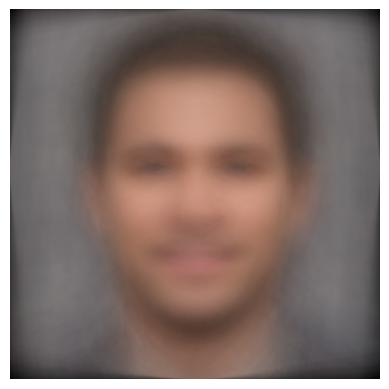

In [36]:
# Load and align all images
aligned_images = []
images = [str(path) for path in list(pathlib.Path("images/men").glob("*.jpg"))]
for i in range(len(images)):
    try:
        image = cv2.imread(images[i])
        aligned_image = list(align_face(image))
        #print(type(aligned_image))
        if aligned_image != None:
            aligned_images.append(aligned_image)
        else:
            print(f"Error, ignoring {images[i]}")
    except:
        continue

# Calculate the average image
aligned_images = np.array(aligned_images)
average_image = np.mean(aligned_images, axis=0).astype(np.uint8)
average_image = cv2.cvtColor(average_image, cv2.COLOR_BGR2RGB)

image = Image.fromarray(average_image, )
#image.save("composite_man.jpg")

# Display the composite face
plt.imshow(image)
plt.axis('off')
plt.show()

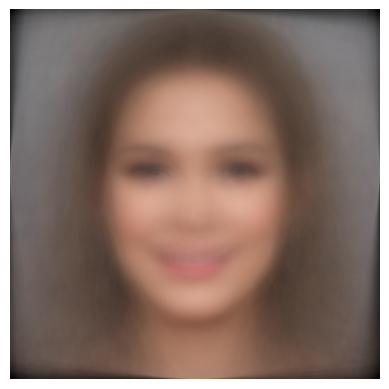

In [37]:
# Load and align all images
aligned_images = []
images = [str(path) for path in list(pathlib.Path("images/women").glob("*.jpg"))]
for i in range(len(images)):
    try:
        image = cv2.imread(images[i])
        aligned_image = list(align_face(image))
        #print(type(aligned_image))
        if aligned_image != None:
            aligned_images.append(aligned_image)
        else:
            print(f"Error, ignoring {images[i]}")
    except:
        continue

# Calculate the average image
aligned_images = np.array(aligned_images)
average_image = np.mean(aligned_images, axis=0).astype(np.uint8)
average_image = cv2.cvtColor(average_image, cv2.COLOR_BGR2RGB)

image = Image.fromarray(average_image, )
#image.save("composite_woman.jpg")

# Display the composite face
plt.imshow(image)
plt.axis('off')
plt.show()

Turning the images, didn't really help that much, although I think they do look a bit better. I will have to do some more complicated math to get these to be very clear.

***THIS NEXT CODE IS NOT MY CODE!***
This code comes from the amazing repo https://github.com/stekhn/average-faces-opencv. I've edited it a little bit to make it work with modern numpy, but otherwise this comes from that github repo.

In [109]:
# Has 50 cent, Adele, and Joe Biden just for testing
path = "test_image"

In [110]:
w = 500
h = 500

impaths = list(pathlib.Path(path).glob("*.jpg"))
all_points = []
images = []
for filepath in impaths:
    # Getting all images
    img = cv2.imread(str(filepath))
    img = np.float32(img)
    images.append(img)
    
    # Getting all facial landmarks
    landmarks = find_landmarks(str(filepath))
    landmarks_array = full_object_detection_to_nparray(landmarks)
    all_points.append(landmarks_array)

print(len(images))
print(len(all_points))

3
3


In [111]:
eyecorner_dst = [
        (int(0.3 * w), int(h / 3)),
        (int(0.7 * w), int(h / 3))
    ]

images_norm = []
points_norm = []

# Add boundary points for delaunay triangulation
boundary_pts = np.array([
    (0, 0), (w / 2, 0), (w - 1, 0), (w - 1, h / 2),
    (w - 1, h - 1), (w / 2, h - 1), (0, h - 1), (0, h / 2)
])

# Initialize location of average points to 0s
points_avg = np.array(
    [(0, 0)] * (len(all_points[0]) + len(boundary_pts)),
    np.float32()
)

num_images = len(images)
num_images

3

In [112]:
def similarity_transform(in_points, out_points):
    s60 = math.sin(60 * math.pi / 180)
    c60 = math.cos(60 * math.pi / 180)

    in_pts = np.copy(in_points).tolist()
    out_pts = np.copy(out_points).tolist()

    xin = c60 * (in_pts[0][0] - in_pts[1][0]) - s60 * \
        (in_pts[0][1] - in_pts[1][1]) + in_pts[1][0]
    yin = s60 * (in_pts[0][0] - in_pts[1][0]) + c60 * \
        (in_pts[0][1] - in_pts[1][1]) + in_pts[1][1]

    in_pts.append([int(xin), int(yin)])

    xout = c60 * (out_pts[0][0] - out_pts[1][0]) - s60 * \
        (out_pts[0][1] - out_pts[1][1]) + out_pts[1][0]
    yout = s60 * (out_pts[0][0] - out_pts[1][0]) + c60 * \
    (out_pts[0][1] - out_pts[1][1]) + out_pts[1][1]

    out_pts.append([int(xout), int(yout)])

    tform = cv2.estimateAffinePartial2D(np.array([in_pts]), np.array([out_pts]));
    
    return tform[0]

In [113]:
# Warp images and trasnform landmarks to output coordinate system,
# and find average of transformed landmarks.
for i in range(0, num_images):

    points1 = all_points[i]

    # Corners of the eye in input image
    eyecorner_src = [all_points[i][36], all_points[i][45]]

    # Compute similarity transform
    tform = similarity_transform(eyecorner_src, eyecorner_dst)

    # Apply similarity transformation
    img = cv2.warpAffine(images[i], tform, (w, h))

    # Apply similarity transform on points
    points2 = np.reshape(np.array(points1), (68, 1, 2))
    points = cv2.transform(points2, tform)
    points = np.float32(np.reshape(points, (68, 2)))

    # Append boundary points. Will be used in Delaunay Triangulation
    points = np.append(points, boundary_pts, axis=0)

    # Calculate location of average landmark points.
    points_avg = points_avg + points / num_images

    points_norm.append(points)
    images_norm.append(img)

In [114]:
# Calculate Delanauy triangles
def calculate_triangles(rect, points):
    # Create subdiv
    subdiv = cv2.Subdiv2D(rect)

    # Insert points into subdiv
    for p in points:
        subdiv.insert((p[0], p[1]))

    # List of triangles. Each triangle is a list of 3 points ( 6 numbers )
    triangle_list = subdiv.getTriangleList()
    # Find the indices of triangles in the points array
    delaunay_tri = []

    for t in triangle_list:
        pt = []

        pt.append((t[0], t[1]))
        pt.append((t[2], t[3]))
        pt.append((t[4], t[5]))

        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])

        if rect_contains(rect, pt1) and rect_contains(rect, pt2) and rect_contains(rect, pt3):
            ind = []
            for j in range(0, 3):
                for k in range(0, len(points)):
                    if abs(pt[j][0] - points[k][0]) < 1.0 and abs(pt[j][1] - points[k][1]) < 1.0:
                        ind.append(k)
            if len(ind) == 3:
                delaunay_tri.append((ind[0], ind[1], ind[2]))

    return delaunay_tri

In [115]:
# Check if a point is inside a rectangle
def rect_contains(rect, point):
    if point[0] < rect[0]:
        return False
    elif point[1] < rect[1]:
        return False
    elif point[0] > rect[2]:
        return False
    elif point[1] > rect[3]:
        return False
    return True

In [116]:
def constrain_point(p, w, h):
    p = (min(max(p[0], 0), w - 1), min(max(p[1], 0), h - 1))

    return p

In [117]:
# Warps and alpha blends triangular regions from img1 and img2 to img
def warp_triangle(img1, img2, t1, t2):

    # Find bounding rectangle for each triangle
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))

    # Offset points by left top corner of the respective rectangles
    t1_rect = []
    t2_rect = []
    t2_rect_int = []

    for i in range(0, 3):
        t1_rect.append(((t1[i][0] - r1[0]), (t1[i][1] - r1[1])))
        t2_rect.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))
        t2_rect_int.append(((t2[i][0] - r2[0]), (t2[i][1] - r2[1])))

    # Get mask by filling triangle
    mask = np.zeros((r2[3], r2[2], 3), dtype=np.float32)
    cv2.fillConvexPoly(mask, np.int32(t2_rect_int), (1.0, 1.0, 1.0), 16, 0)

    # Apply warpImage to small rectangular patches
    img1_rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]

    size = (r2[2], r2[3])

    img2_rect = apply_affine_transform(img1_rect, t1_rect, t2_rect, size)
    img2_rect = img2_rect * mask

    # Copy triangular region of the rectangular patch to the output image
    img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] * ((1.0, 1.0, 1.0) - mask)
    img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]] + img2_rect


In [118]:
# Apply affine transform calculated using src_tri and dst_tri to src and
# output an image of size.
def apply_affine_transform(src, src_tri, dst_tri, size):

    # Given a pair of triangles, find the affine transform.
    warp_mat = cv2.getAffineTransform(np.float32(src_tri), np.float32(dst_tri))

    # Apply the Affine Transform just found to the src image
    dst = cv2.warpAffine(src, warp_mat, (size[0], size[1]), None,
        flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)

    return dst

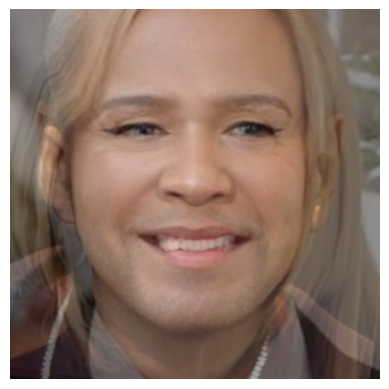

In [121]:
# Delaunay triangulation
rect = (0, 0, w, h)
tri = calculate_triangles(rect, np.array(points_avg))

# Output image
output = np.zeros((h, w, 3), np.float32())

# Warp input images to average image landmarks
for i in range(0, len(images_norm)):
    img = np.zeros((h, w, 3), np.float32())
    # Transform triangles one by one
    for j in range(0, len(tri)):
        t_in = []
        t_out = []

        for k in range(0, 3):
            p_in = points_norm[i][tri[j][k]]
            p_in = constrain_point(p_in, w, h)

            p_out = points_avg[tri[j][k]]
            p_out = constrain_point(p_out, w, h)

            t_in.append(p_in)
            t_out.append(p_out)

        warp_triangle(images_norm[i], img, t_in, t_out)

    # Add image intensities for averaging
    output = output + img

# Divide by num_images to get average
output = output / num_images
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
output_rgb = output_rgb.astype(np.uint8)
new_image = Image.fromarray(output_rgb, )
#image.save("composite_man.jpg")

# Display the composite face
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [122]:
new_image.save("test_image_average.jpg")

In [151]:
def average_all_images(impaths_list):
    w = 500
    h = 500
    
    all_points = []
    images = []
    for filepath in impaths_list:
        try:
            # Getting all facial landmarks
            landmarks = find_landmarks(str(filepath))
            landmarks_array = full_object_detection_to_nparray(landmarks)
            all_points.append(landmarks_array)

            # Getting all images
            img = cv2.imread(str(filepath))
            img = np.float32(img)
            images.append(img)
        except:
            # If there is an error, just don't include the image
            continue
    
    eyecorner_dst = [
        (int(0.3 * w), int(h / 3)),
        (int(0.7 * w), int(h / 3))
    ]

    images_norm = []
    points_norm = []
    
    # Add boundary points for delaunay triangulation
    boundary_pts = np.array([
        (0, 0), (w / 2, 0), (w - 1, 0), (w - 1, h / 2),
        (w - 1, h - 1), (w / 2, h - 1), (0, h - 1), (0, h / 2)
    ])
    
    # Initialize location of average points to 0s
    points_avg = np.array(
        [(0, 0)] * (len(all_points[0]) + len(boundary_pts)),
        np.float32()
    )
    
    num_images = len(images)

    # Warp images and trasnform landmarks to output coordinate system,
    # and find average of transformed landmarks.
    for i in range(0, num_images):
    
        points1 = all_points[i]
    
        # Corners of the eye in input image
        eyecorner_src = [all_points[i][36], all_points[i][45]]
    
        # Compute similarity transform
        tform = similarity_transform(eyecorner_src, eyecorner_dst)
    
        # Apply similarity transformation
        img = cv2.warpAffine(images[i], tform, (w, h))
    
        # Apply similarity transform on points
        points2 = np.reshape(np.array(points1), (68, 1, 2))
        points = cv2.transform(points2, tform)
        points = np.float32(np.reshape(points, (68, 2)))
    
        # Append boundary points. Will be used in Delaunay Triangulation
        points = np.append(points, boundary_pts, axis=0)
    
        # Calculate location of average landmark points.
        points_avg = points_avg + points / num_images
    
        points_norm.append(points)
        images_norm.append(img)

    # Delaunay triangulation
    rect = (0, 0, w, h)
    tri = calculate_triangles(rect, np.array(points_avg))
    
    # Output image
    output = np.zeros((h, w, 3), np.float32())
    
    # Warp input images to average image landmarks
    for i in range(0, len(images_norm)):
        img = np.zeros((h, w, 3), np.float32())
        # Transform triangles one by one
        for j in range(0, len(tri)):
            t_in = []
            t_out = []
    
            for k in range(0, 3):
                p_in = points_norm[i][tri[j][k]]
                p_in = constrain_point(p_in, w, h)
    
                p_out = points_avg[tri[j][k]]
                p_out = constrain_point(p_out, w, h)
    
                t_in.append(p_in)
                t_out.append(p_out)
    
            warp_triangle(images_norm[i], img, t_in, t_out)
    
        # Add image intensities for averaging
        output = output + img
    
    # Divide by num_images to get average
    output = output / num_images
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    output_rgb = output_rgb.astype(np.uint8)
    new_image = Image.fromarray(output_rgb, )

    return new_image

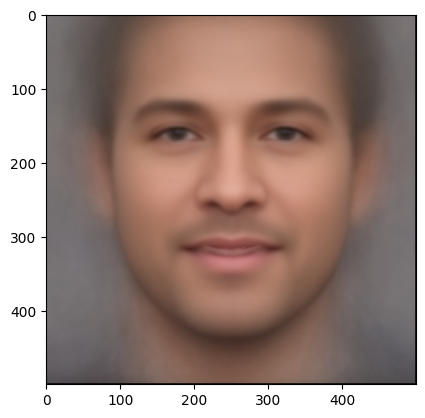

In [126]:
impaths = list(pathlib.Path("images/men").glob("*.jpg"))
composite_man = average_all_images(impaths)
plt.imshow(composite_man)
plt.show()

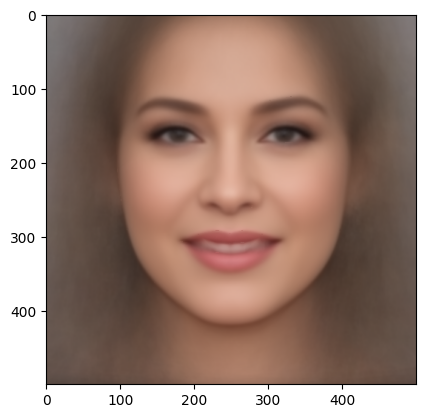

In [127]:
impaths = list(pathlib.Path("images/women").glob("*.jpg"))
composite_woman = average_all_images(impaths)
plt.imshow(composite_woman)
plt.show()

In [128]:
composite_man.save("composite_man.jpg")
composite_woman.save("composite_woman.jpg")

WOAH! That works way better. Now, time for the finale: averaging each of the levels of attractiveness 0-10.

In [146]:
# Not enough data below one, so combine first 2 bins (0-2)
zero_to_two_men = []
zero_to_two_women = []

two_to_three_men = []
two_to_three_women = []

three_to_four_men = []
three_to_four_women = []

four_to_five_men = []
four_to_five_women = []

five_to_six_men = []
five_to_six_women = []

six_to_seven_men = []
six_to_seven_women = []

seven_to_eight_men = []
seven_to_eight_women = []

# Not enough data above eight, so combine last 2 bins (8-10)
eight_to_ten_men = []
eight_to_ten_women = []

for i, filename in enumerate(average_ratings["2"]):
    rating = average_ratings.iloc[i]["3"]
    gender = average_ratings.iloc[i]["gender"]
    if rating < 2:
        if gender == "men":
            zero_to_two_men.append(filename)
        elif gender == "women":
            zero_to_two_women.append(filename)
            
    elif rating < 3:
        if gender == "men":
            two_to_three_men.append(filename)
        elif gender == "women":
            two_to_three_women.append(filename)
            
    elif rating < 4:
        if gender == "men":
            three_to_four_men.append(filename)
            
        elif gender == "women":
            three_to_four_women.append(filename)
            
    elif rating < 5:
        if gender == "men":
            four_to_five_men.append(filename)
        elif gender == "women":
            four_to_five_women.append(filename)
            
    elif rating < 6:
        if gender == "men":
            five_to_six_men.append(filename)
        elif gender == "women":
            five_to_six_women.append(filename)
            
    elif rating < 7:
        if gender == "men":
            six_to_seven_men.append(filename)
        elif gender == "women":
            six_to_seven_women.append(filename)
            
    elif rating < 8:
        if gender == "men":
            seven_to_eight_men.append(filename)
        elif gender == "women":
            seven_to_eight_women.append(filename)
            
    elif rating <= 10:
        if gender == "men":
            eight_to_ten_men.append(filename)
        elif gender == "women":
            eight_to_ten_women.append(filename)

    else:
        print(filename, rating)

In [148]:
print(len(zero_to_two_men))
print(len(zero_to_two_women))

7
8


In [149]:
print(len(eight_to_ten_men))
print(len(eight_to_ten_women))

14
2


Only 2 women above an 8? That one might turn out below average. Anyways, here are all of the averages per bin:

In [159]:
def save_and_show_composite(image_list, title):
    composite = average_all_images(image_list)
    composite.save(f"composites/{title}.jpg")
    plt.imshow(composite)
    plt.show()

***0-2***

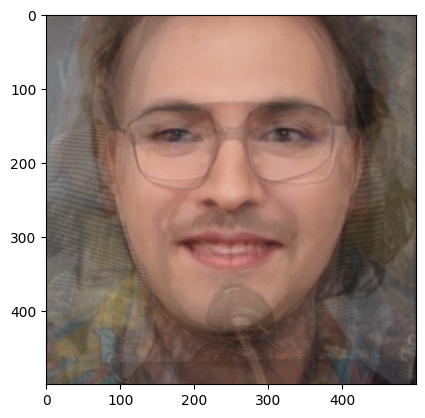

In [160]:
save_and_show_composite(zero_to_two_men, "composite_zero_to_two_man")

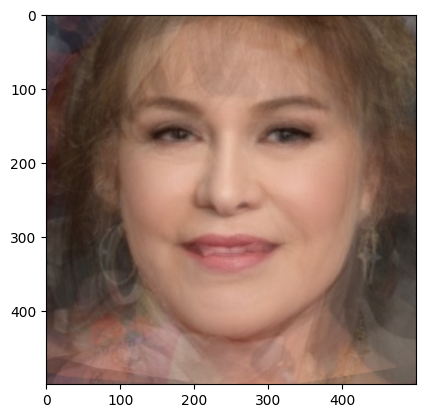

In [161]:
save_and_show_composite(zero_to_two_women, "composite_zero_to_two_woman")

***2-3***

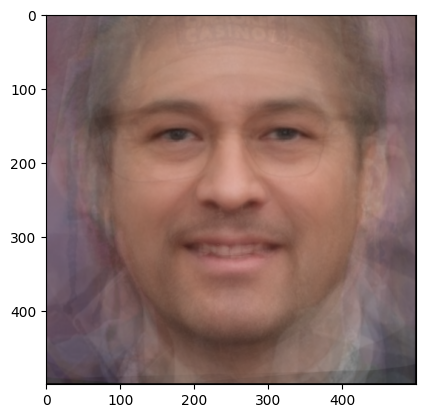

In [163]:
save_and_show_composite(two_to_three_men, "composite_two_to_three_man")

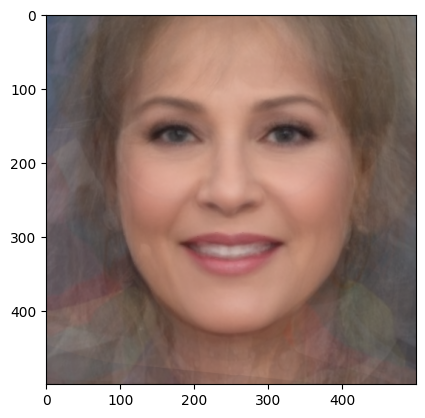

In [164]:
save_and_show_composite(two_to_three_women, "composite_two_to_three_woman")

***3-4***

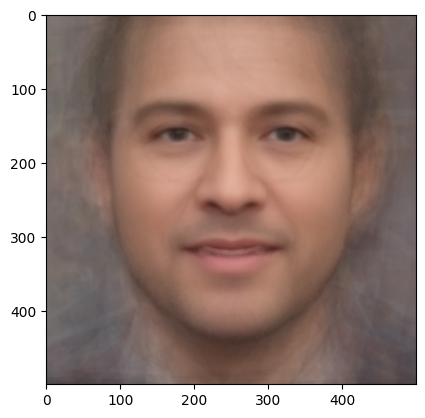

In [165]:
save_and_show_composite(three_to_four_men, "composite_three_to_four_man")

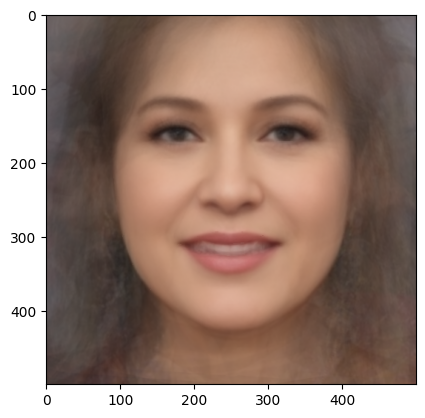

In [166]:
save_and_show_composite(three_to_four_women, "composite_three_to_four_woman")

***4-5***

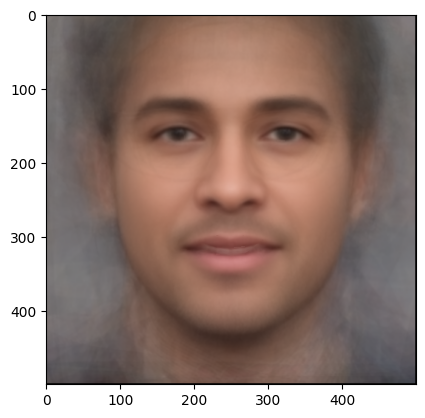

In [167]:
save_and_show_composite(four_to_five_men, "composite_four_to_five_man")

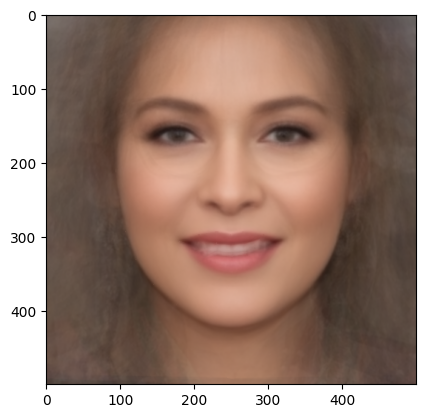

In [168]:
save_and_show_composite(four_to_five_women, "composite_four_to_five_woman")

***5-6***

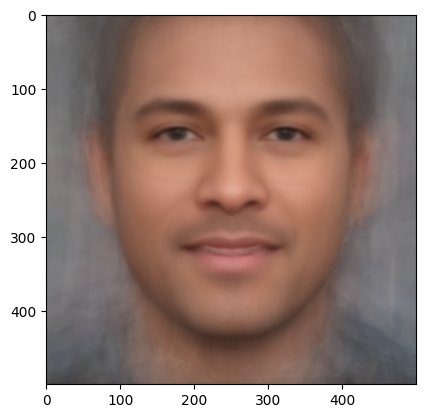

In [169]:
save_and_show_composite(five_to_six_men, "composite_five_to_six_man")

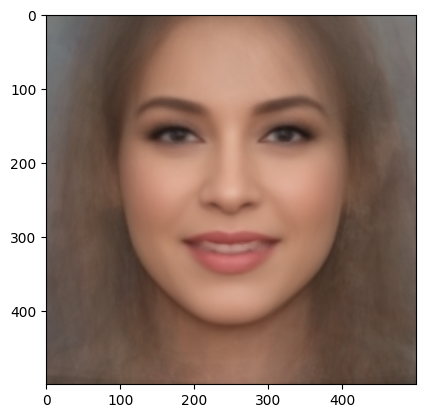

In [170]:
save_and_show_composite(five_to_six_women, "composite_five_to_six_woman")

***6-7***

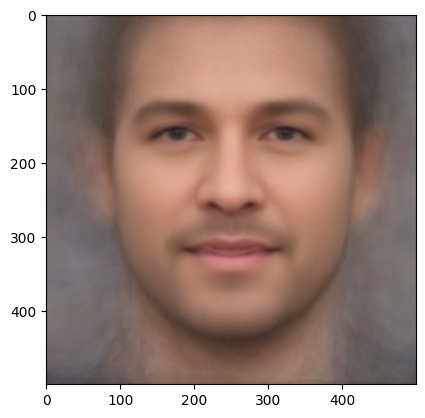

In [173]:
save_and_show_composite(six_to_seven_men, "composite_six_to_seven_man")

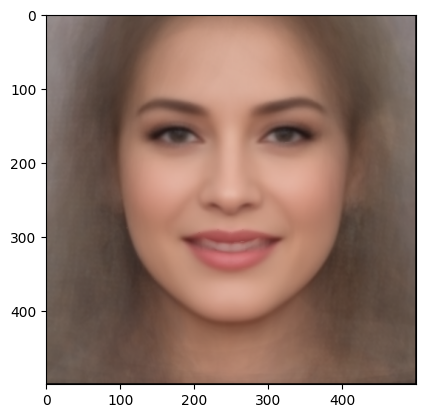

In [174]:
save_and_show_composite(six_to_seven_women, "composite_six_to_seven_woman")

***7-8***

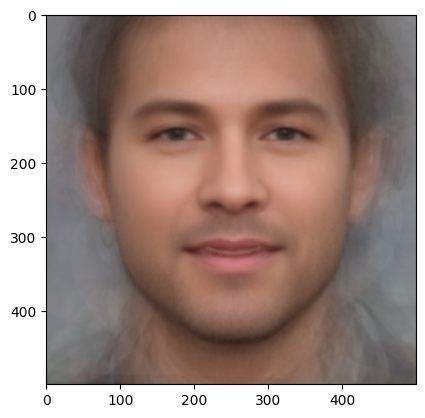

In [175]:
save_and_show_composite(seven_to_eight_men, "composite_seven_to_eight_man")

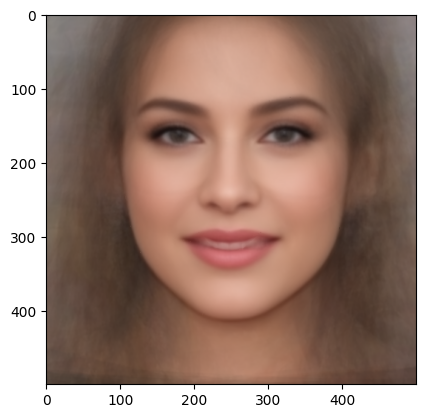

In [176]:
save_and_show_composite(seven_to_eight_women, "composite_seven_to_eight_woman")

***8-10***

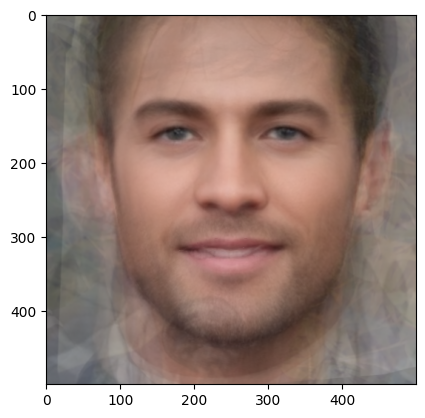

In [177]:
save_and_show_composite(eight_to_ten_men, "composite_eight_to_ten_man")

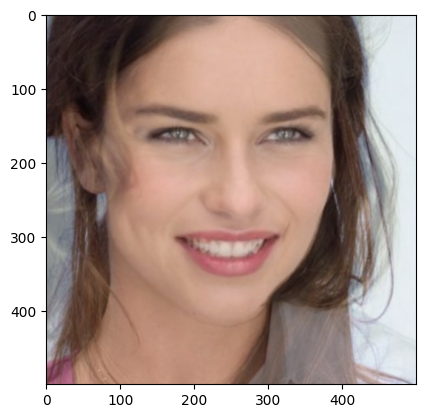

In [178]:
save_and_show_composite(eight_to_ten_women, "composite_eight_to_ten_woman")

Pretty good, all of the images actually show general features that change as attractiveness increases. For example, it seems like the man's glasses go away as he gets more attractive.